# Code Implementation Of KNN

## Basic KNN Classifier using Scikit-learn

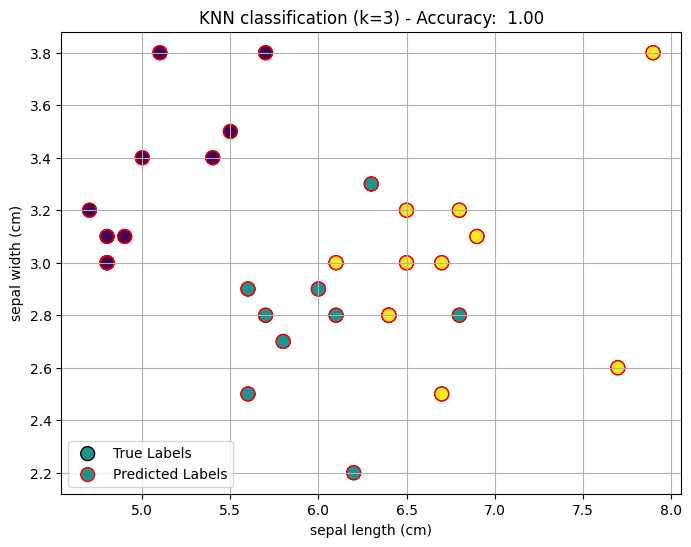

In [4]:
# importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with K = 3
knn = KNeighborsClassifier(n_neighbors=4)


# Train the model
knn.fit(X_train, y_train)


# Predict on the test set
y_pred = knn.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)



# Plot the results
plt.figure(figsize=(8, 6))

# Plot the true labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label="True Labels", cmap='viridis', s=100, edgecolors='k')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', label="Predicted Labels", cmap='viridis', s=100, edgecolors='r')

plt.title(f'KNN classification (k=3) - Accuracy: {accuracy : .2f}')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best')
plt.grid(True)
plt.show()




## Basic KNN Classifier From Scratch

In [6]:
import numpy as np
from collections import Counter


# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]

        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

y_pred = knn(X_train, y_train,X_test, k = 3)
accuracy = np.mean(y_pred == y_test)

print(f'Accuracy from scratch : {accuracy}')

Accuracy from scratch : 1.0
